In [69]:
%autosave 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Autosaving every 1 seconds


In [70]:
"""load data"""
train=pd.read_csv('C:/Users/Anjali kumari/Downloads/digit-recognizer/train.csv')
test=pd.read_csv('C:/Users/Anjali kumari/Downloads/digit-recognizer/test.csv')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

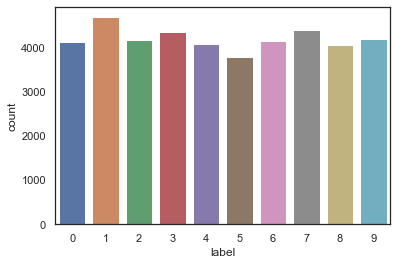

In [71]:
Y_train=train['label']
X_train=train.drop('label',axis=1)  #keep whole data with label column dropped\
del train
Y_train[:5]
g=sns.countplot(Y_train)
Y_train.value_counts() #count specific values frequency

In [72]:
"""identify null value"""
X_train.isnull().any().describe()
#X_train.isnull().any().any()-X_train.isnull() print data frame, any() print column wise true false for missing value, any() true or false is there is missing or not


count       784
unique        1
top       False
freq        784
dtype: object

In [73]:
test.isnull().any().describe() #no null in test dataset

count       784
unique        1
top       False
freq        784
dtype: object

In [74]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
"""value of each pixel lies within 255-"""

'value of each pixel lies within 255-'

In [75]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
"""Our images are 28x28 but to using Keras they have to be 3D matrices"""
"""Here -1 for input x specifies that this dimension should be dynamically computed based on the number of input values in x"""
"""Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices."""

'Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.'

In [76]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)


In [77]:
"""Split training and valdiation set"""
# Set the random seed
random_seed = 2


In [78]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)
"""I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model."""

'I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.'

In [79]:
"""Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation.

To avoid that, you could use stratify = True option in train_test_split function (Only for >=0.17 sklearn versions)."""

"Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation.\n\nTo avoid that, you could use stratify = True option in train_test_split function (Only for >=0.17 sklearn versions)."

'X_train[0].shape  '

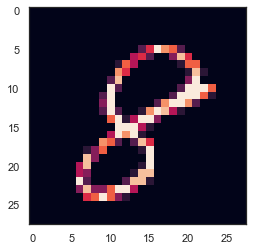

In [80]:
g = plt.imshow(X_train[0][:,:,0])
"""28 row 28 column 1 channel as grayscale otherwise 3 for RGB"""
"""X_train[0].shape  """

In [81]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [82]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [83]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [84]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [85]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [86]:
# Without data augmentation i obtained an accuracy of 0.98114
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
#          validation_data = (X_val, Y_val), verbose = 2)

In [87]:
#data augmentation
"""For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more."""
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


E:\anaconda3\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (37800, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [88]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/1
238s - loss: 0.4214 - acc: 0.8655 - val_loss: 0.0832 - val_acc: 0.9748


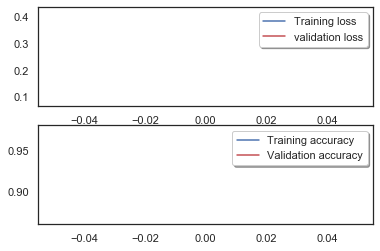

In [89]:
# Plot the loss and accuracy curves for training and validatio
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss",axes =ax[0])
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

[[1.3443128e-06 3.9140766e-09 4.6096202e-10 6.6546844e-11 1.0523192e-08
  1.2232674e-06 9.9999428e-01 3.1692832e-11 3.0500466e-06 5.4456950e-09]
 [2.4884950e-05 1.1486823e-05 5.6684115e-05 1.7448690e-05 8.9576565e-02
  6.0012011e-05 8.5525307e-06 4.9237050e-03 5.9213098e-03 8.9939940e-01]
 [4.7940894e-06 1.7091219e-05 8.4406267e-08 5.3462423e-05 1.2476235e-05
  9.9878019e-01 1.1109453e-04 4.9990149e-07 9.5421216e-04 6.6252222e-05]
 [4.4580152e-05 1.0843981e-04 3.8625914e-04 8.0780752e-05 1.1561100e-05
  4.1310548e-05 1.4971857e-06 9.9834490e-01 5.5935241e-05 9.2467596e-04]
 [7.3126503e-05 2.3678156e-05 2.3433720e-05 1.3791400e-04 3.1847954e-03
  5.9195310e-03 3.3684046e-04 2.6904622e-03 1.2948799e-03 9.8631531e-01]
 [1.5122812e-05 1.0434104e-04 9.9911815e-01 2.5296048e-04 2.1507629e-05
  1.2079285e-07 1.7485720e-06 2.0731486e-04 2.6356688e-04 1.4952471e-05]
 [1.0537757e-03 1.2944990e-03 2.9284153e-03 9.5308399e-01 3.8091157e-04
  3.3464178e-02 1.0111756e-03 2.4522183e-04 5.2396548e-03 

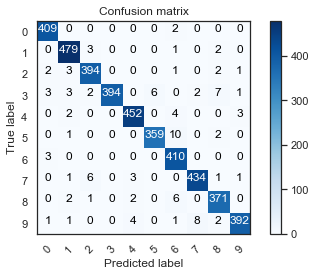

In [111]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(ticks=tick_marks,labels=classes,rotation=45)
    plt.yticks(ticks=tick_marks,labels=classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        
    thresh=cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #no need of for i in range(a):for j in range(b) to print whole matrix
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color='white' if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    


# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# print(Y_pred[:10])
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)     #"""Y_pred is n*10 so converted to 1*10"""
# print(Y_pred_classes[:10])
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)              #"""Y_val is n*10 as Y is turned to categorical thus Y_val is also n*10"""
# print(Y_true[:10])
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 



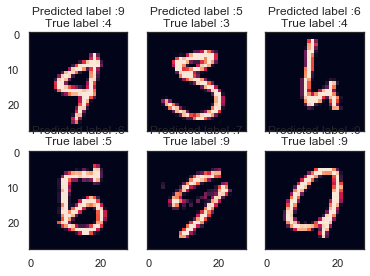

In [175]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]   #take values where True is present inside parameter
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True) #to have shared x and y axis for both rows of plots
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]   #error_index is list of 6 top errors
            ax[row][col].imshow(img_errors[error].reshape(28,28))    #since we have reshaped X_val to 28*28*1 i.e 3d for use in keras so to print image again make it 2d 28*28
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n+=1

    
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
# Predicted probabilities of the true values in the error set
# {{A=np.take(Y_pred_errors, Y_true_errors, axis=1)
# print(Y_true_errors[:5])
# print(Y_pred_errors[0],Y_pred_errors[1])
# print(a[0])}}
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1)) #understand by writing down on paper as A will be 106*106
# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)     #returns original index of elements as in sorted order 
# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]
# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [179]:
# predict results
results = model.predict(test)
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")


In [181]:
print(results)

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [184]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
print(submission)
submission.to_csv("Anjit_cnn_mnist_datagen.csv",index=False)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
